In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [3]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [4]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df = df.select_dtypes(exclude=['object'])

In [7]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [8]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


<Axes: >

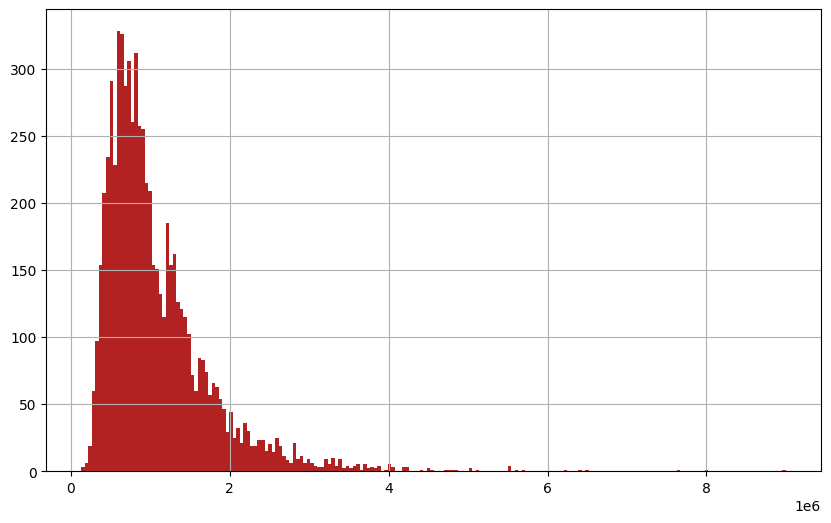

In [9]:
#Histograma
df.Price.hist(color='firebrick', bins=200, figsize=(10, 6))

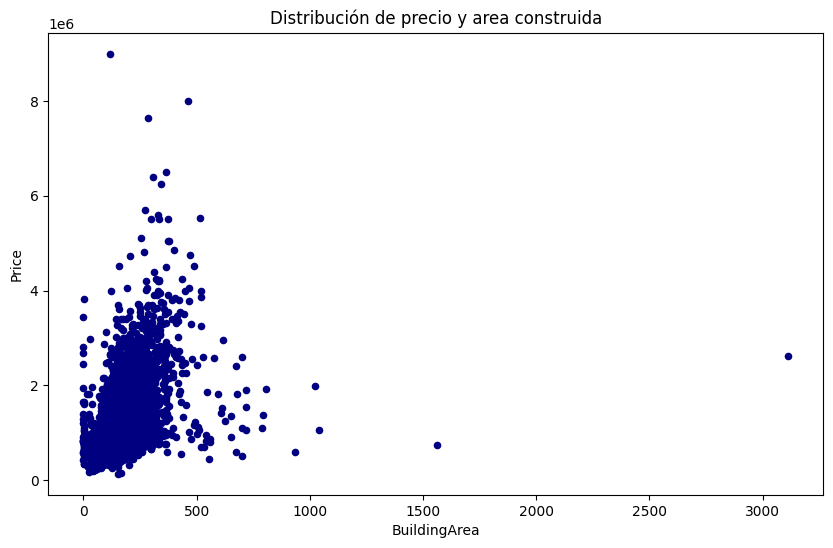

In [10]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [11]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


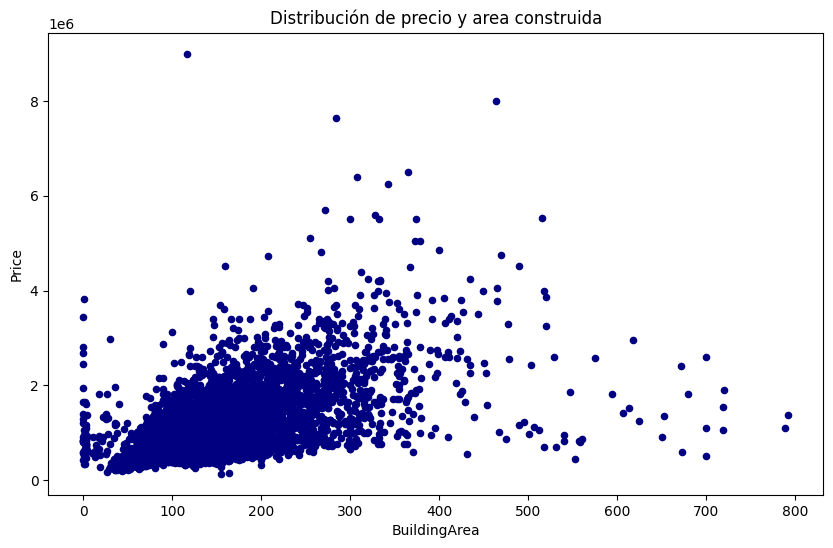

In [12]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [13]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [14]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>4]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [15]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


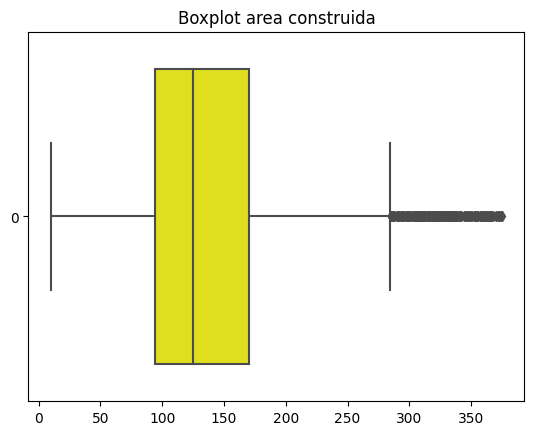

In [16]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

In [17]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

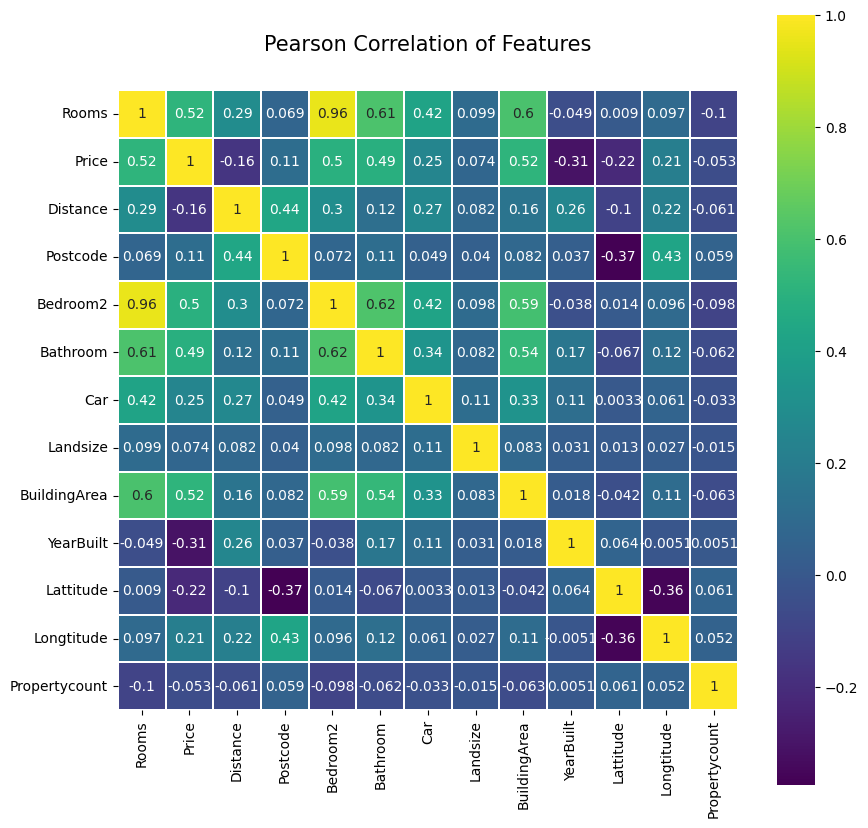

In [18]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [19]:
df0[df0["Landsize"]==0].count()

Rooms            1007
Price            1007
Distance         1007
Postcode         1007
Bedroom2         1007
Bathroom         1007
Car              1007
Landsize         1007
BuildingArea     1007
YearBuilt        1007
Lattitude        1007
Longtitude       1007
Propertycount    1007
dtype: int64

Text(0.5, 1.0, 'Distribución de precio y area construida')

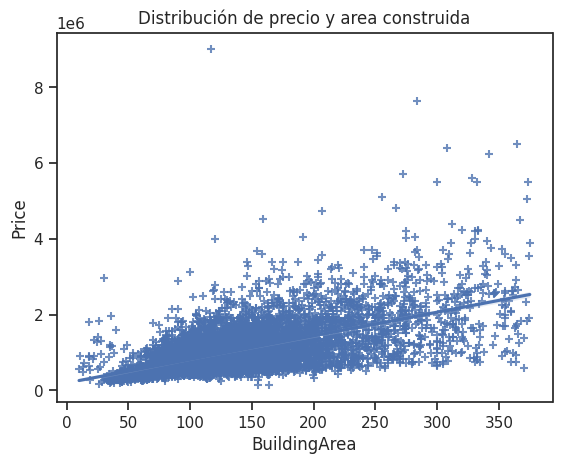

In [20]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="BuildingArea", y="Price", data=df0, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y area construida')

In [21]:
#Regresión lineal (Area construida vs. Precio)
x = df0["BuildingArea"]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4315.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:45:22   Log-Likelihood:                -97109.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6676   BIC:                         1.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.987e+05   1.45e+04     13.732   

In [22]:
df0 = df0.drop(['Bedroom2', 'Postcode', 'Lattitude', 'Longtitude'], axis=1)

In [23]:
df0.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [24]:
import statsmodels.api as sm

# Regresión lineal múltiple
X = df0.iloc[:, [2, 6, 7]]
y = df0["Price"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     2874.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:45:22   Log-Likelihood:                -96004.
No. Observations:                6678   AIC:                         1.920e+05
Df Residuals:                    6674   BIC:                         1.920e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.005e+07   2.79e+05     36.065   

In [37]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
train, test = train_test_split(df0, test_size=0.20)
print("Ejemplos utilizados para entrenamiento:", len(train))
print("Ejemplos utilizados para prueba:", len(test))


Ejemplos utilizados para entrenamiento: 5342
Ejemplos utilizados para prueba: 1336


In [38]:
import statsmodels.api as sm

# Preparación de datos de entrenamiento
# Seleccionar las columnas predictoras
X_train = train.iloc[:, [2, 6, 7]]
# Seleccionar la variable objetivo
y_train = train["Price"]

# Agregar una columna constante (intercepto) a las características
X_train = sm.add_constant(X_train)

# Crear y ajustar el modelo de regresión lineal
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     2306.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:46:41   Log-Likelihood:                -76795.
No. Observations:                5342   AIC:                         1.536e+05
Df Residuals:                    5338   BIC:                         1.536e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           1.1e+07   3.23e+05     34.018   

In [39]:
# Definición de las variables de entrenamiento
X_train = train.iloc[:, [2, 6, 7]]  # Características de entrenamiento
y_train = train["Price"]  # Variable objetivo de entrenamiento

# Definición de las variables de prueba
X_test = test.iloc[:, [2, 6, 7]]  # Características de prueba
y_test = test["Price"]  # Variable objetivo de prueba


In [40]:
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_train

1572     2600000.0
2433     1600000.0
48        450000.0
2458      872000.0
1111     2375000.0
           ...    
10346     505000.0
12153     870000.0
6727     1646000.0
7534      959000.0
12352     900000.0
Name: Price, Length: 5342, dtype: float64

In [41]:
# Realizar predicciones utilizando el modelo entrenado
y_pred_train = model.predict(X_train)

# Mostrar las predicciones
y_pred_train


array([1511057.81546227,  303799.71230913,  757630.84927213, ...,
        855029.20136973, 1190538.11481685,  488919.15053283])

In [42]:
# Obtener los coeficientes de la regresión
coefficients = model.coef_
intercept = model.intercept_

print('Coeficientes del modelo:')
print(coefficients)

# Calcular y mostrar el error cuadrático medio (RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False)
print("Error cuadrático medio (RMSE): %.2f" % rmse)

# Calcular y mostrar el coeficiente de determinación (R^2)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print('Coeficiente de determinación (R^2): %.2f' % r2)

# Mostrar los coeficientes de la regresión (pendientes y ordenada al origen)
print('Coeficientes del modelo: w = {}, b = {:.2f}'.format(coefficients, intercept))


Coeficientes del modelo:
[-24485.67797863   6685.41607281  -5407.09158033]
Error cuadrático medio (RMSE): 423693.19
Coeficiente de determinación (R^2): 0.56
Coeficientes del modelo: w = [-24485.67797863   6685.41607281  -5407.09158033], b = 11001220.95


In [43]:
# Realizar predicciones en el conjunto de entrenamiento
predictions_train = model.predict(X_train)

# Mostrar las primeras 10 predicciones y valores reales
print("Predicciones en el conjunto de entrenamiento:")
for true_value, predicted_value in zip(y_train[:10], predictions_train[:10]):
    print("Valor real: {:.2f} - Valor estimado: {:.2f}".format(true_value, predicted_value))


Predicciones en el conjunto de entrenamiento:
Valor real: 1745000.00 - Valor estimado: 1511057.82
Valor real: 510000.00 - Valor estimado: 303799.71
Valor real: 800000.00 - Valor estimado: 757630.85
Valor real: 1811000.00 - Valor estimado: 1507309.32
Valor real: 650000.00 - Valor estimado: 934677.41
Valor real: 1203500.00 - Valor estimado: 734911.79
Valor real: 1100000.00 - Valor estimado: 1622822.37
Valor real: 700000.00 - Valor estimado: 1058629.82
Valor real: 1560000.00 - Valor estimado: 1400309.18
Valor real: 815000.00 - Valor estimado: 1004924.38


In [44]:
# Realizar predicciones en el conjunto de prueba
predictions_test = model.predict(X=X_test)

# Mostrar las primeras 10 predicciones en el conjunto de prueba
print("Predicciones en el conjunto de prueba:")
print(predictions_test[:10])

# Calcular y mostrar el error cuadrático medio (RMSE) en el conjunto de prueba
from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_true=y_test, y_pred=predictions_test, squared=False)
print(f"\nEl error cuadrático medio (RMSE) en el conjunto de prueba es: {rmse_test:.2f}")


Predicciones en el conjunto de prueba:
[ 882792.77407845  614108.57109442 1951495.38301619  691234.55161452
   95424.85667332  732958.42309266  868007.00472049  925039.39850184
 1572567.78095998  554520.50558297]

El error cuadrático medio (RMSE) en el conjunto de prueba es: 426663.92


In [45]:
# Paso 1: Convertir la serie de Pandas 'y_train' en un arreglo (array)
y_train_array = np.array(y_train)

# Paso 2: Realizar predicciones en el conjunto de entrenamiento y convertirlas en un arreglo
y_pred = model.predict(X_train)
y_pred_array = np.array(y_pred)

# Imprimir el tipo de variable después de la conversión
print("1. El tipo es: ", type(y_train_array))
print("2. El tipo es: ", type(y_pred_array))

1. El tipo es:  <class 'numpy.ndarray'>
2. El tipo es:  <class 'numpy.ndarray'>


Coeficiente de determinación para el taller #4: 0.5645016826502302
Coeficiente de determinación redondeado para el taller #4: 0.56



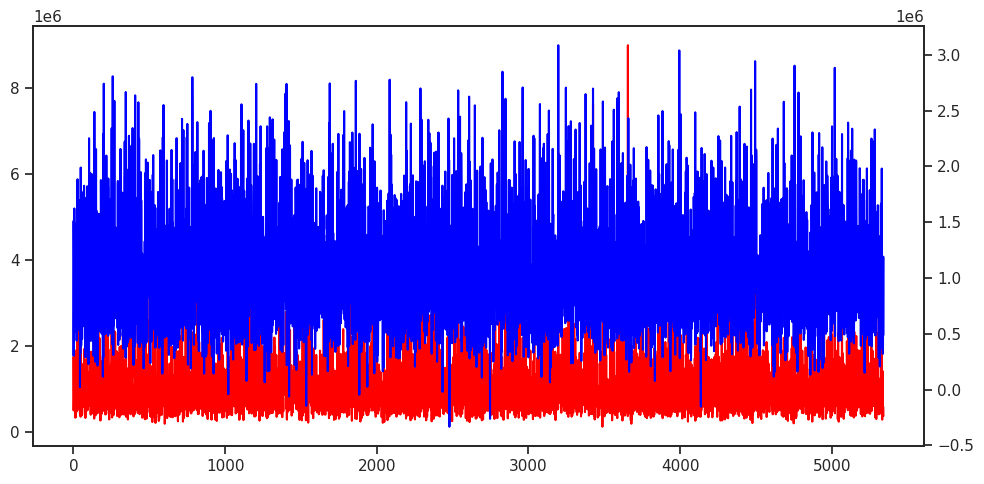

In [46]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Calcular el coeficiente de determinación (R^2)
coefficient_of_determination = r2_score(y_train_array, y_pred_array)

# Mostrar el coeficiente de determinación
print("Coeficiente de determinación para el taller #4:", coefficient_of_determination)
print("Coeficiente de determinación redondeado para el taller #4:", round(coefficient_of_determination, 2))
print("")

# Graficar ambos conjuntos de datos
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig, ax1 = plt.subplots()
ax1.plot(y_train_array, color='red', label='Valor real')
ax2 = ax1.twinx()
ax2.plot(y_pred_array, color='blue', label='Predicción')
fig.tight_layout()

# Mostrar la gráfica
plt.show()
